In [1]:
%matplotlib inline


# Tutorial 01: Words Collection

Collecting literature data, including text and metadata for specified search terms.


## Words Analysis

The 'Words' approach collects text and meta-data from articles found for requested search terms.




In [2]:
# Import the Words object, which is used for words collection
from lisc import Words

# Import the SCDB object, which organizes a database structure for saved data
from lisc.utils.db import SCDB

# Import a utility function for saving out collected data
from lisc.utils.io import save_object




# Import the custom objects that are used to store collected words data
from lisc.data import Articles, ArticlesAll

# Import database and IO utilities to reload our previously collected data
from lisc.utils.db import SCDB
from lisc.utils.io import load_object

# Import plots that are available for words data
from lisc.plts.words import plot_wordcloud

import scispacy
import spacy
nlp = spacy.load("en_ner_bionlp13cg_md")



import matplotlib.pyplot as plt
from wordcloud import WordCloud


import pandas as pd

## Words Object

The :class:`~.Words` object is used to collect and analyze text data and article metadata.

Search terms are specified, as previously introduced, to find articles of interest,
from which text data and meta-data is collected.




In [3]:
# Set some search terms
terms = [['roundworm','Ascaris lumbricoides', 'Ascariasis'], ['whipworm','Trichuris', 'trichiura'], 
         ['hookworm','Nector', 'americanus', 'Ancylostoma', 'duodenale']]

In [4]:
# Initialize Words object and set the terms to search for
words = Words()
words.add_terms(terms)

infant_grp = ['infant', 'infants']
child_grp = ['child', 'children']
adult_grp = ['adult', 'adults']


age_group_in = infant_grp
age_group_ex = adult_grp+child_grp

age_grp = "infant"

term_list = ["roundworm", "whipworm", "hookworm"]

symptoms_list = ['anaemia', 'diarrhoea', "cough", "eosinophilic",
                 "loeffler", "hepatopancreatic", "dyspnoea", "haemoptysis", "wakana", 
                 "asthenia", "abdominal", "pain", "oedema", "occult", "faecal", "blood", 
                 "melaena", "appetite", "gastrointestinal", "bleeding", 
                 "bowel", "obstruction", "volvulus", "intussusception", "peritonitis", 
                 "gastric", "rectal", "prolapse", "microbiome", "microbiota", "gut", 
                "metabolites", "anemia", "intestinal", "growth", "faltering", 
                "vomit", "volmiting", "cholangitis", "pancreatitis", "anorexia", "gall", "gallbladder", 
                "bladder", "cough", "cancer", "developmental", "hyperactivity"]

geography_list = ["africa", "america", "asia"]

microbiome_list = ["bacteriodes","fermicutes", "proteobacteria", "actinobacteria", 
                  "oscillibacter", "flavonifractor", "butyrivibrio", "allobaculum", 
                   "solobacterium", "lactobacillus", "campylobacter", "heligmosomoides"]

immune_list = ["immunity", "inflammation", "allergy", 
               "chronicity",   "Tregs", "Th2", "IL33", "IL25",  "cytokines", "protection", 
               "vaccines", "benefits", "IgE", "eosinophils", "sensitization"]

inclustion_terms = ['symptoms', 'symptom'] + age_group_in
exclustion_terms = age_group_ex

# Set up inclusions and exclusions
#   Each is a list, that should be the same length as the number of terms
inclusions = [inclustion_terms, 
              inclustion_terms, 
              inclustion_terms]
exclusions = [exclustion_terms, 
              exclustion_terms, 
              exclustion_terms]

In [5]:
num_article = 100
chosen_list = symptoms_list

To get started, we will first run a collection of words data, collecting up to
5 articles for each search term, as specified by the `retmax` parameter.




In [6]:
# Collect words data
words.run_collection(retmax=num_article)

In [7]:
# Set up our database object, so we can save out data as we go
db = SCDB('lisc_db')

# Collect words data
words.run_collection(usehistory=True, retmax=num_article, save_and_clear=True, directory=db)

# Save out the words data
save_object(words, 'tutorial_words', directory=db)

In [9]:
# Import the custom objects that are used to store collected words data
from lisc.data import Articles, ArticlesAll

# Import database and IO utilities to reload our previously collected data
from lisc.utils.db import SCDB
from lisc.utils.io import load_object

# Import plots that are available for words data
from lisc.plts.words import plot_wordcloud

import scispacy
import spacy
nlp = spacy.load("en_ner_bionlp13cg_md")

In [10]:
# Reload the words object, specifying to also reload the article data
words = load_object('tutorial_words', directory=SCDB('lisc_db'), reload_results=True)

In [11]:
# Preprocess article data
words.process_articles()

# Process collected data into aggregated data objects
words.process_combined_results()

In [12]:
words_list = []

for num in range(0,3):
    words_dict = {}
    print("----------------------------------", term_list[num],"-------",age_group_in)
    for i in words.combined_results[num].words:
        doc = nlp(i)
        for token in doc:
            if(token.pos_ == "NOUN" or token.pos_ == "ADJ"):
                if(words.combined_results[0].words[i] > 1 and i in chosen_list):
                    print(i, "-", words.combined_results[num].words[i], "[", token.ent_type_,"]")
                    words_dict[i] = words.combined_results[num].words[i]
    
    words_list.append(words_dict)
                    
    print()
    print()
                    

---------------------------------- roundworm ------- ['infant', 'infants']
developmental - 3 [  ]
gastrointestinal - 3 [  ]
faecal - 4 [  ]
intestinal - 58 [  ]
blood - 12 [ ORGANISM_SUBSTANCE ]
bowel - 8 [ ORGAN ]
abdominal - 5 [  ]
pain - 4 [  ]
anaemia - 3 [  ]
anemia - 8 [  ]
growth - 4 [  ]
gall - 2 [  ]
bladder - 7 [ ORGAN ]
volvulus - 2 [  ]
obstruction - 4 [  ]
gut - 2 [ ORGANISM_SUBDIVISION ]
cancer - 2 [ CANCER ]


---------------------------------- whipworm ------- ['infant', 'infants']
intestinal - 55 [  ]
faecal - 24 [  ]
gastrointestinal - 35 [  ]
growth - 2 [  ]
gut - 12 [ ORGANISM_SUBDIVISION ]
blood - 11 [ ORGANISM_SUBSTANCE ]
anemia - 14 [  ]
developmental - 4 [  ]
cancer - 2 [ CANCER ]
anaemia - 1 [  ]
volvulus - 1 [  ]


---------------------------------- hookworm ------- ['infant', 'infants']
intestinal - 33 [  ]
faecal - 8 [  ]
anaemia - 2 [  ]
gastrointestinal - 9 [  ]
growth - 8 [  ]
anemia - 13 [  ]
blood - 11 [ ORGANISM_SUBSTANCE ]
cancer - 2 [ CANCER ]
volvul

[0301/152431.571992:INFO:headless_shell.cc(659)] Written to file /var/folders/xq/jzjdx561799bjvdt3yh9jprr0000gn/T/tmp2cqq90by/temp.png.
[0301/152432.906077:INFO:headless_shell.cc(659)] Written to file /var/folders/xq/jzjdx561799bjvdt3yh9jprr0000gn/T/tmpxzpxclra/temp.png.
[0301/152434.241094:INFO:headless_shell.cc(659)] Written to file /var/folders/xq/jzjdx561799bjvdt3yh9jprr0000gn/T/tmpr99nzn1r/temp.png.


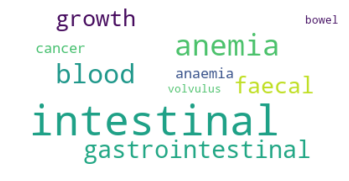

In [14]:
import pandas as pd
import dataframe_image as dfi

for i in range(0,3):
    data_items = words_list[i].items()
    data_list = list(data_items)
    df = pd.DataFrame(data_list)
    
    dfi.export(df, 'img/{}_dataframe_{}.png'.format(age_grp,term_list[i]))
    
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
    wordcloud.generate_from_frequencies(frequencies=words_list[i])
    
#     plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    wordcloud.to_file("img/{}_word_clouds_{}.png".format(age_grp,term_list[i]))

